# Proyecto Final Propedéutico: Análisis de datos de ECOBICI

### Equipo 6:

- Darío 
- Eduardo Moreno
- Elena Villalobos

### Introducción

El presente proyecto final tuvo como objetivo analizar bases de datos proporcionadas por el sistema de bicicletas públicas de la Ciudad de México, ECOBICI. El trabajo escrito se divide en tres capítulos que describen los objetivos presentados a continación. 

### Objetivos 

**1. Análisis descriptivo:**

Realizar un análisis descriptivo las bases de datos de mayo 2019 y mayo 2020. Se eligieron dichos meses debido a que se contrastó si existe alguna diferencia en el uso de dicho sistema por la actual contingencia sanitaria por el COVID-19. 

**2. Analisis de rutas y tiempo de viajes:**

Realizar un análisis de las rutas y de los tiempos de viaje de las bases de mayo 2019 y mayo 2020.

**3. Análisis de series de tiempo con cantidad de viajes:**

Realizar un análisis de serie de tiempo de la cantidad de viajes realizados, con modelos ARIMA. Este análisis se realizó tomando en cuenta los datos desde febrero 2010 hasta mayo 2020.

### Características generales del sistema ECOBICI

Es un método de transporte público para recorrer distancias cortas y medianas. ECOBICI cuenta con 480 cicloestaciones en 55 colonias de la ciudad, así como 6,800 bicicletas. Este sistema comenzó desde febrero de 2010 y ha crecido a lo largo de los años. 

### Información de uso

Se utiliza una tarjeta para poder tomar bicicletas de cualquier cicloestación y después depositarla en el lugar más cercano a tu destino. Se utilizar en trayectos ilimitados de 45 minutos cada uno durante el periodo contratado. El horario de servicio es de 05:00 a 00:30 horas de lunes a domingo. 

## 1. Análisis descriptivo

### Características de la base de datos:

Para este primer capítulo se analizaron los meses de mayo 2019 y mayo 2020. Ambas bases, después de una limpieza y observación detallada de variables y varoles atípicos, contienen 13 variables:

1. Genero_Usuario: M (Masculino), F (Femenino).
2. Edad_Usuario: Edad del usuario que realiza el viaje.
3. Bici: Identificación de la bicicleta utilizada.
4. Ciclo_Estacion_Retiro: Identificación de la cicloestación de donde se retiró la bicicleta. 
5. Dia_Re: Día del retiro de la bicicleta.
6. Mes_Re: Mes del retiro de la bicicleta.
7. Anio_Re: Año del retiro de la bicicleta.
8. Hora_Retiro: Hora de retiro de la bicicleta
9. Ciclo_Estacion_Arribo: Identificación de la cicloestación en la arribó la bicicleta. 
10. Dia_Ar: Día del arribo de la bicicleta.
11. Mes_Ar: Mes del arribo de la bicicleta.
12. Anio_Ar: Año de arribo de la bicicleta.
13. Hora_Arribo: Hora de arribo de la bicicleta.

- La base de Mayo 2019 tiene: 750,834 observaciones. 

- La base de Mayo 2020 tiene: 153,126 observaciones.

In [1]:
# Clear workspace
rm(list=ls())

In [89]:
# Packages
library(tidyverse)
options(repr.plot.width=10,repr.plot.height=10)

In [4]:
# Setting working directory
setwd("~/Documents/Prope20MCD/Practicas_equipos/practica-final-por-equipos-verano-2020-itam-Eduardo-Moreno")

In [5]:
# Data
may_20 <- read.csv('Mayo20.csv')
may_19 <- read.csv('Mayo19.csv')

In [192]:
# Observamos datos
glimpse(may_19)

Rows: 750,834
Columns: 13
$ Genero_Usuario        <fct> M, M, M, F, M, M, M, M, M, M, M, M, M, M, F, M,…
$ Edad_Usuario          <int> 25, 26, 28, 23, 33, 32, 34, 31, 34, 30, 28, 44,…
$ Bici                  <int> 1427, 8431, 10212, 12098, 11352, 8502, 9239, 93…
$ Ciclo_Estacion_Retiro <int> 372, 202, 340, 290, 290, 64, 374, 390, 64, 207,…
$ Dia_Re                <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ Mes_Re                <int> 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,…
$ Anio_Re               <int> 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,…
$ Hora_Retiro           <fct> 00:00:04, 00:00:26, 00:00:49, 00:00:51, 00:01:0…
$ Ciclo_Estacion_Arribo <int> 397, 318, 394, 292, 292, 68, 332, 173, 67, 129,…
$ Dia_Ar                <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ Mes_Ar                <int> 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,…
$ Anio_Ar               <int> 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,…
$ Hora_Arribo           <f

In [193]:
glimpse(may_20)

Rows: 153,126
Columns: 13
$ Genero_Usuario        <fct> M, M, M, M, M, M, M, M, M, M, M, M, M, M, M, M,…
$ Edad_Usuario          <int> 44, 33, 30, 29, 46, 39, 34, 27, 19, 30, 20, 35,…
$ Bici                  <fct> 2570, 7849, 8624, 8659, 10275, 11089, 11563, 41…
$ Ciclo_Estacion_Retiro <int> 24, 4, 12, 171, 287, 156, 234, 143, 167, 295, 1…
$ Dia_Re                <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ Mes_Re                <int> 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,…
$ Anio_Re               <int> 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020,…
$ Hora_retiro           <fct> 00:00, 00:01, 00:06, 00:07, 00:08, 00:09, 00:09…
$ Ciclo_Estacion_Arribo <int> 183, 4, 1, 330, 288, 80, 270, 70, 166, 136, 43,…
$ Dia_Ar                <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ Mes_Ar                <int> 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,…
$ Anio_Ar               <int> 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020,…
$ Hora_Arribo           <f

Se puede observar que de manera general ambas bases difieren demasiado en la cantidad de observaciones. 

#### Variable de Genero

Primero observamos estadísticas generales del género con respecto a la edad.

In [8]:
may_19 %>% 
  group_by(Genero_Usuario) %>% 
  summarize(media=mean(Edad_Usuario),
            mediana=median(Edad_Usuario),
            min=min(Edad_Usuario),
            max=max(Edad_Usuario))

`summarise()` ungrouping output (override with `.groups` argument)



Genero_Usuario,media,mediana,min,max
<fct>,<dbl>,<dbl>,<int>,<int>
F,33.27523,31,16,78
M,35.79681,33,16,96


In [194]:
may_20 %>% 
  group_by(Genero_Usuario) %>% 
  summarize(media=mean(Edad_Usuario),
            mediana=median(Edad_Usuario),
            min=min(Edad_Usuario),
            max=max(Edad_Usuario))

`summarise()` ungrouping output (override with `.groups` argument)



Genero_Usuario,media,mediana,min,max
<fct>,<dbl>,<int>,<int>,<int>
F,34.74129,32,17,87
M,37.44797,35,16,79


In [91]:
gen <- c(table(may_19$Genero_Usuario),table(may_20$Genero_Usuario))

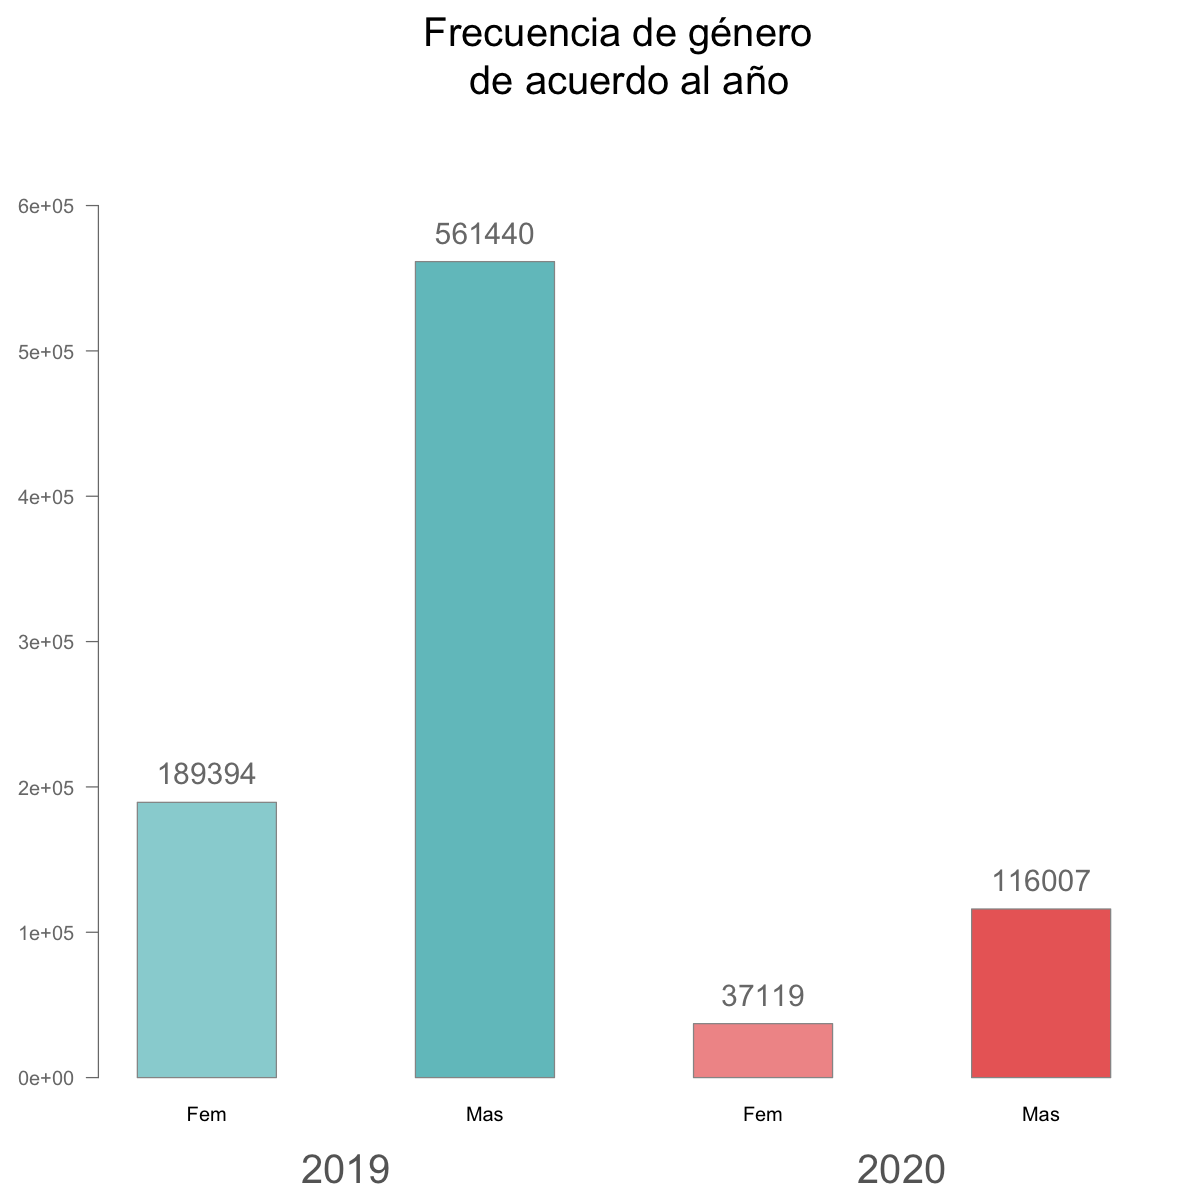

In [196]:
barplot(gen,axes=F,space = 1,ylim=c(0,gen[2]*1.2),
        col=c('#45B4B899',azul,'#E95D59AA',rosa), border=gris,
        names.arg=c('Fem','Mas','Fem','Mas'))
axis(2,las=2,col='gray48',col.axis='gray48')
text(1.5,gen[1]+20000,paste(gen[1]),cex=1.5,col='gray48')
text(3.5,gen[2]+20000,paste(gen[2]),cex=1.5,col='gray48')
text(5.5,gen[3]+20000,paste(gen[3]),cex=1.5,col='gray48')
text(7.5,gen[4]+20000,paste(gen[4]),cex=1.5,col='gray48')
mtext('Frecuencia de género \n de acuerdo al año',3, cex=2)
mtext('2019',1,at=2.5,padj = 3,cex=2,col='gray40')
mtext('2020',1,at=6.5,padj = 3,cex=2,col='gray40')

En este gráfico se observa que en general existe un uso mayor de los hombres tanto en el año 2019 como en el año 2020. Y también se observa que disminuyó de manera significativa el uso de ECOBICI en el mes de mayo 2020. 

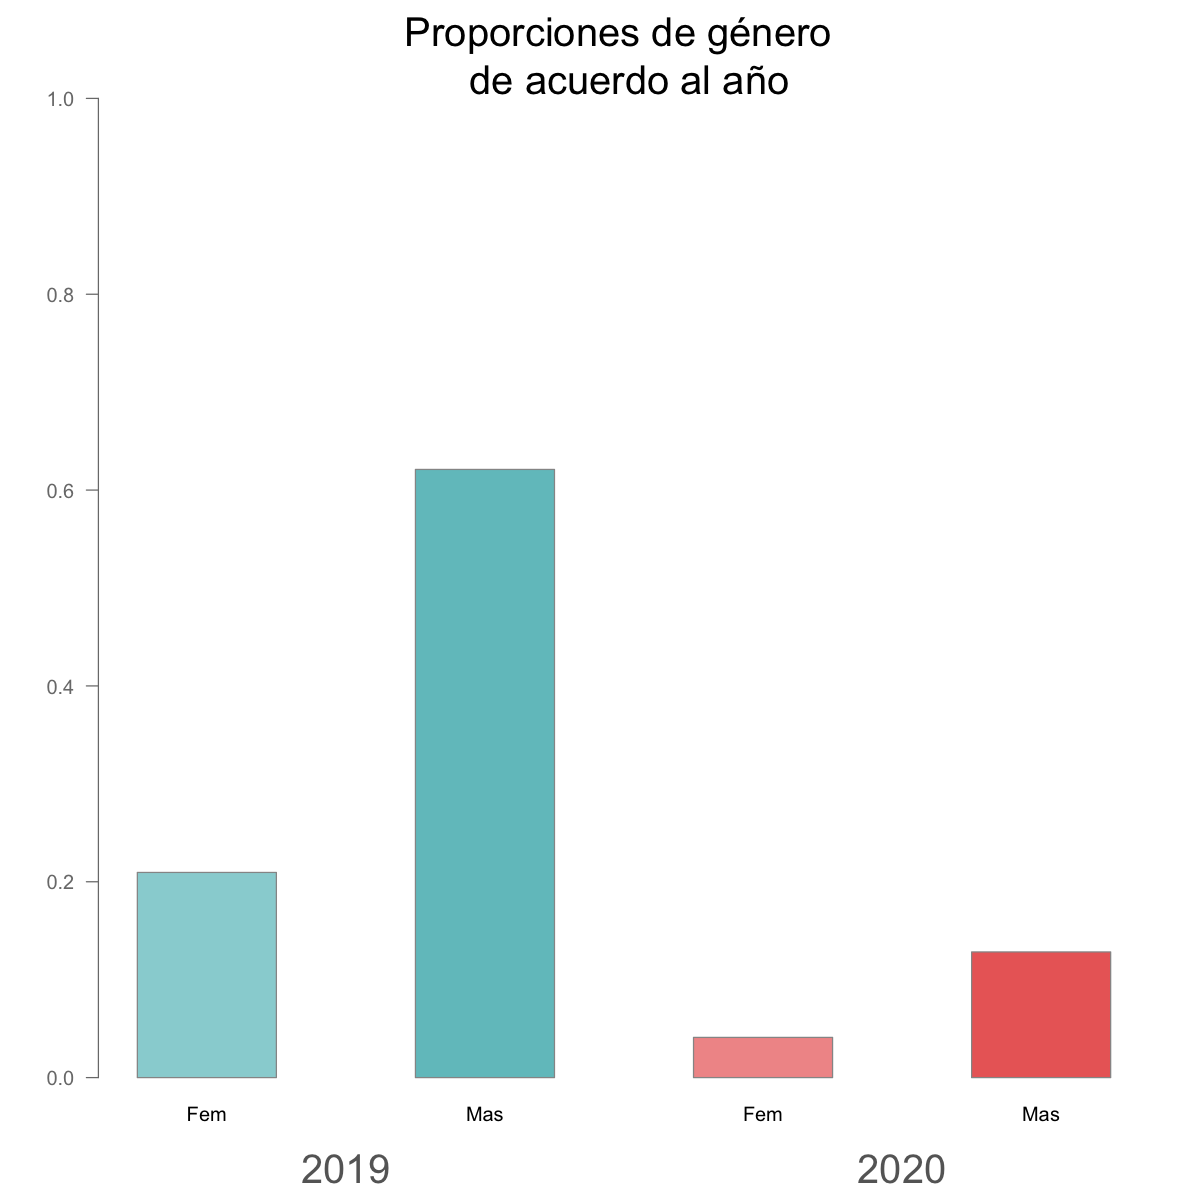

In [202]:
barplot(prop.table(gen),axes=F,space = 1,ylim=c(0,1),
        col=c('#45B4B899',azul,'#E95D59AA',rosa), border=gris,
        names.arg=c('Fem','Mas','Fem','Mas'))
axis(2,las=2,col='gray48',col.axis='gray48')
text(1.5,gen[1]+20000,paste(gen[1]),cex=1.5,col='gray48')
text(3.5,gen[2]+20000,paste(gen[2]),cex=1.5,col='gray48')
text(5.5,gen[3]+20000,paste(gen[3]),cex=1.5,col='gray48')
text(7.5,gen[4]+20000,paste(gen[4]),cex=1.5,col='gray48')
mtext('Proporciones de género \n de acuerdo al año',3, cex=2)
mtext('2019',1,at=2.5,padj = 3,cex=2,col='gray40')
mtext('2020',1,at=6.5,padj = 3,cex=2,col='gray40')

Este gráfico coloca las proporciones de usuarios del género femenino y masculino de ambas bases de datos. Aquí se confirma de nuevo que hubo una mayor proporción de usuarios hombres que utilizaron la bici en mayo 2019. 

### Variable de edad del usuario.

A continuación se presenta un histograma que junta la información de las bases de mayo 2019 y 2020. Se observa que ambas distribuciones son muy similares entre sí con respecto a su distribución, sin embargo, se observa una disminución de alrededor de 3/4 del uso en el mes de mayo 2020. 

Para el histograma de mayo 2019, se observa mayor concentración en el rango de 25 y 40 años de edad. Así mismo, en la base de maEn contraste con el histograma de mayo 2020, donde parece que el rango de edad se ensancha un poco y va de 

In [203]:
edad_19 <- may_19$Edad_Usuario
edad_20 <- may_20$Edad_Usuario

In [204]:
summary(edad_19)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  16.00   28.00   32.00   35.16   40.00   96.00 

In [205]:
summary(edad_20)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  16.00   29.00   34.00   36.79   43.00   87.00 

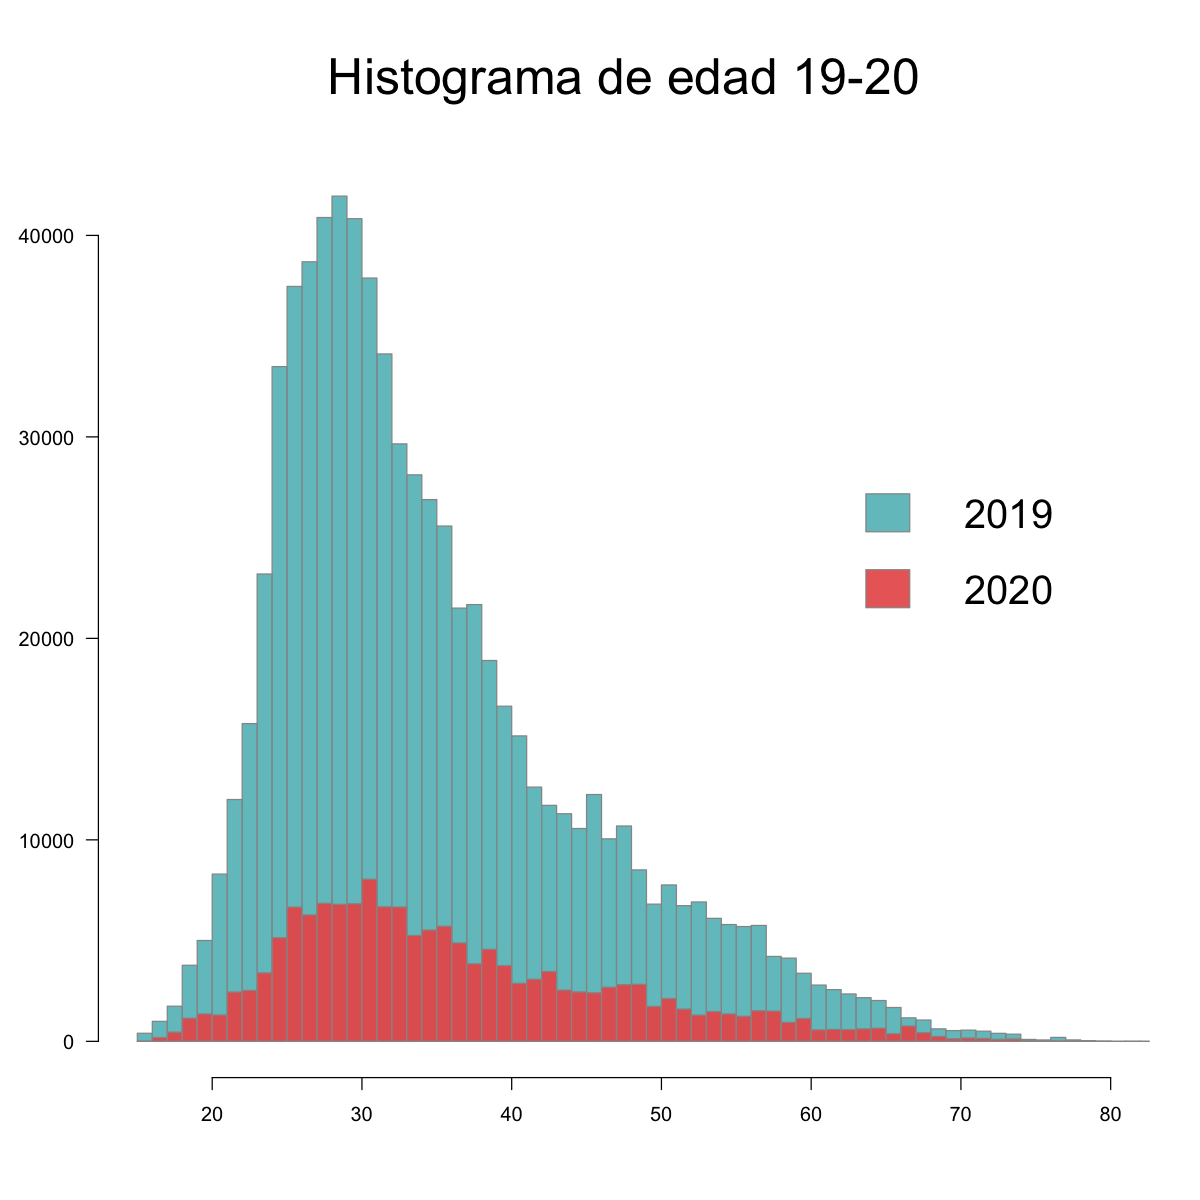

In [210]:
rosa <- '#E95D59EE'
azul <- '#45B4B8CC'
gris <- '#969696FF'
hist(edad_19,
     xlim=c(15,80),ylim=c(0,45000),axes=F,
     xlab='',ylab='',main='',
     breaks=seq(15,100,1),
     col=azul,
     border=gris)
axis(1)
axis(2,las=2)
hist(edad_20,add=T,
     breaks=seq(15,100,1),
     col=rosa,
     border=gris)
mtext('Histograma de edad 19-20', 3, cex=2.5)
legend(60,30000,legend = c(2019,2020),
       fill = c(azul,rosa),border=c(gris,gris),
       box.col='white',cex=2)

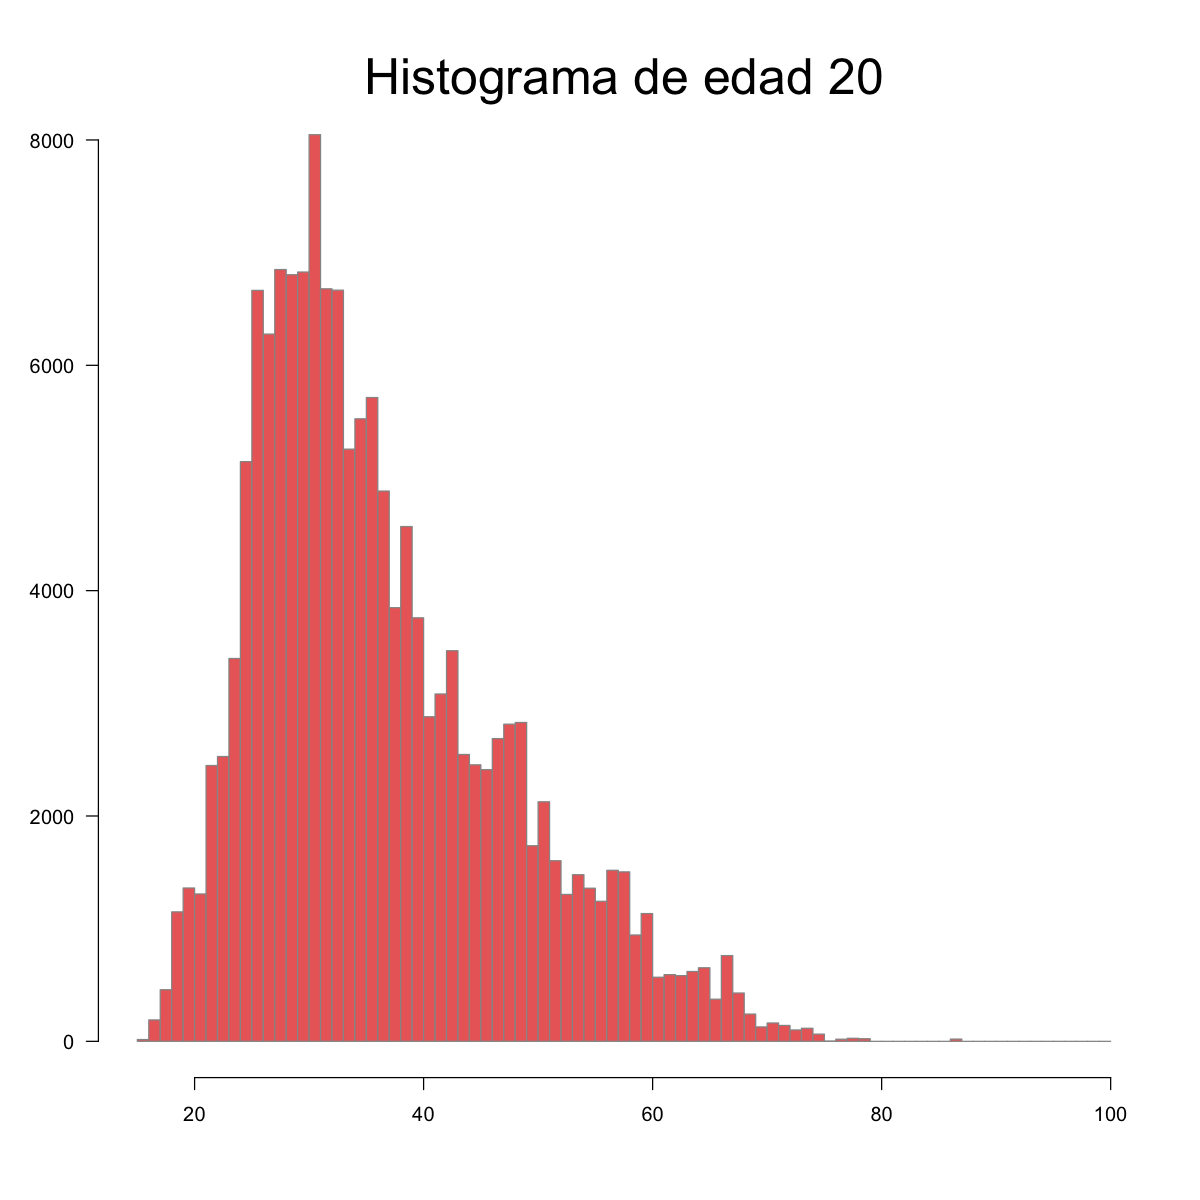

In [215]:
hist(edad_20,
     breaks=seq(15,100,1),
     col=rosa,xlab='',ylab='',
     border=gris,main='',axes=F)
mtext('Histograma de edad 20', 3, cex=2.5)
legend(60,30000,legend = c(2019,2020),
       fill = c(azul,rosa),border=c(gris,gris),
       box.col='white',cex=2)
axis(1)
axis(2,las=2)

In [84]:
estaciones_20 <- may_20 %>% 
  filter(Ciclo_Estacion_Retiro <= 480) %>% 
  filter(Ciclo_Estacion_Arribo <= 480) %>% 
  select(Ciclo_Estacion_Retiro,Ciclo_Estacion_Arribo)

estaciones_19 <- may_19 %>% 
  filter(Ciclo_Estacion_Retiro <= 480) %>% 
  filter(Ciclo_Estacion_Arribo <= 480) %>% 
  select(Ciclo_Estacion_Retiro,Ciclo_Estacion_Arribo)

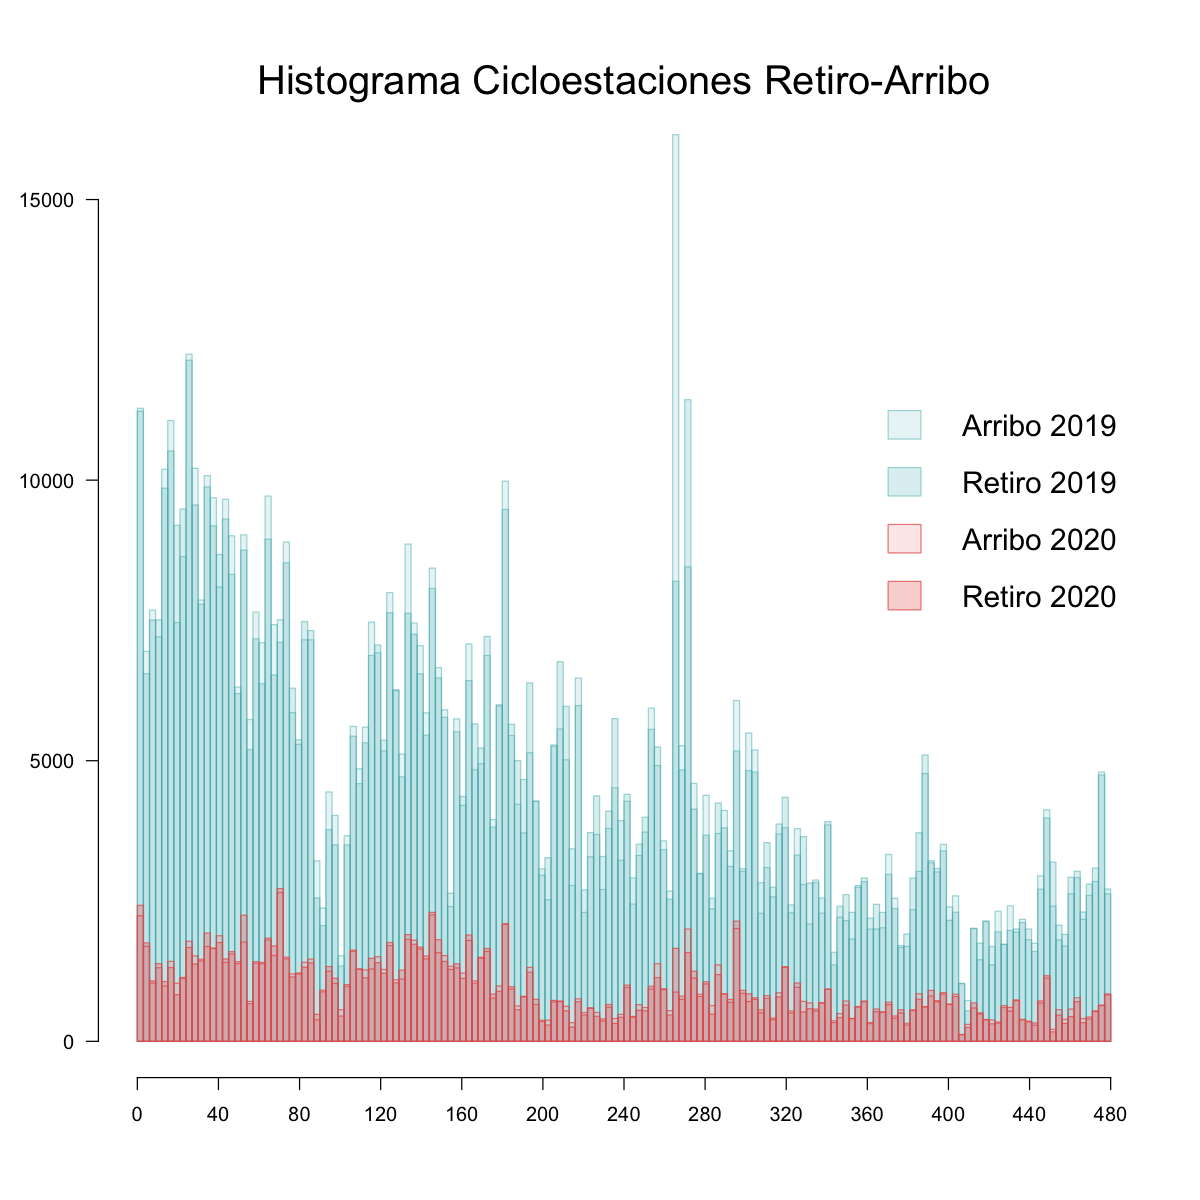

In [126]:
hist(estaciones_19[,2],col='#45B4B822',border='#45B4B877',
     breaks=seq(0,480,3),axes=F,xlab='',ylab='',main='')
axis(1,at=seq(0,480,40))
axis(2,las=2)
mtext('Histograma Cicloestaciones Retiro-Arribo',3,cex=2)
hist(estaciones_19[,1],col='#45B4B833',border='#45B4B877',add=T,breaks=seq(0,480,3))
hist(estaciones_20[,2],add=T,col='#E95D5944',border='#E95D59BB',breaks=seq(0,480,3))
hist(estaciones_20[,1],add=T,col='#E95D5922',border='#E95D59BB',breaks=seq(0,480,3))
legend(350,12000,legend = c('Arribo 2019','Retiro 2019','Arribo 2020','Retiro 2020'),
       fill  = c('#45B4B822','#45B4B833','#E95D5922','#E95D5944'),
       border= c('#45B4B877','#45B4B877','#E95D59BB','#E95D59BB'),
       box.col='white',cex=1.5)

In [152]:
dias_sem <- c('M','V', rep(c('L','M','V'),4))

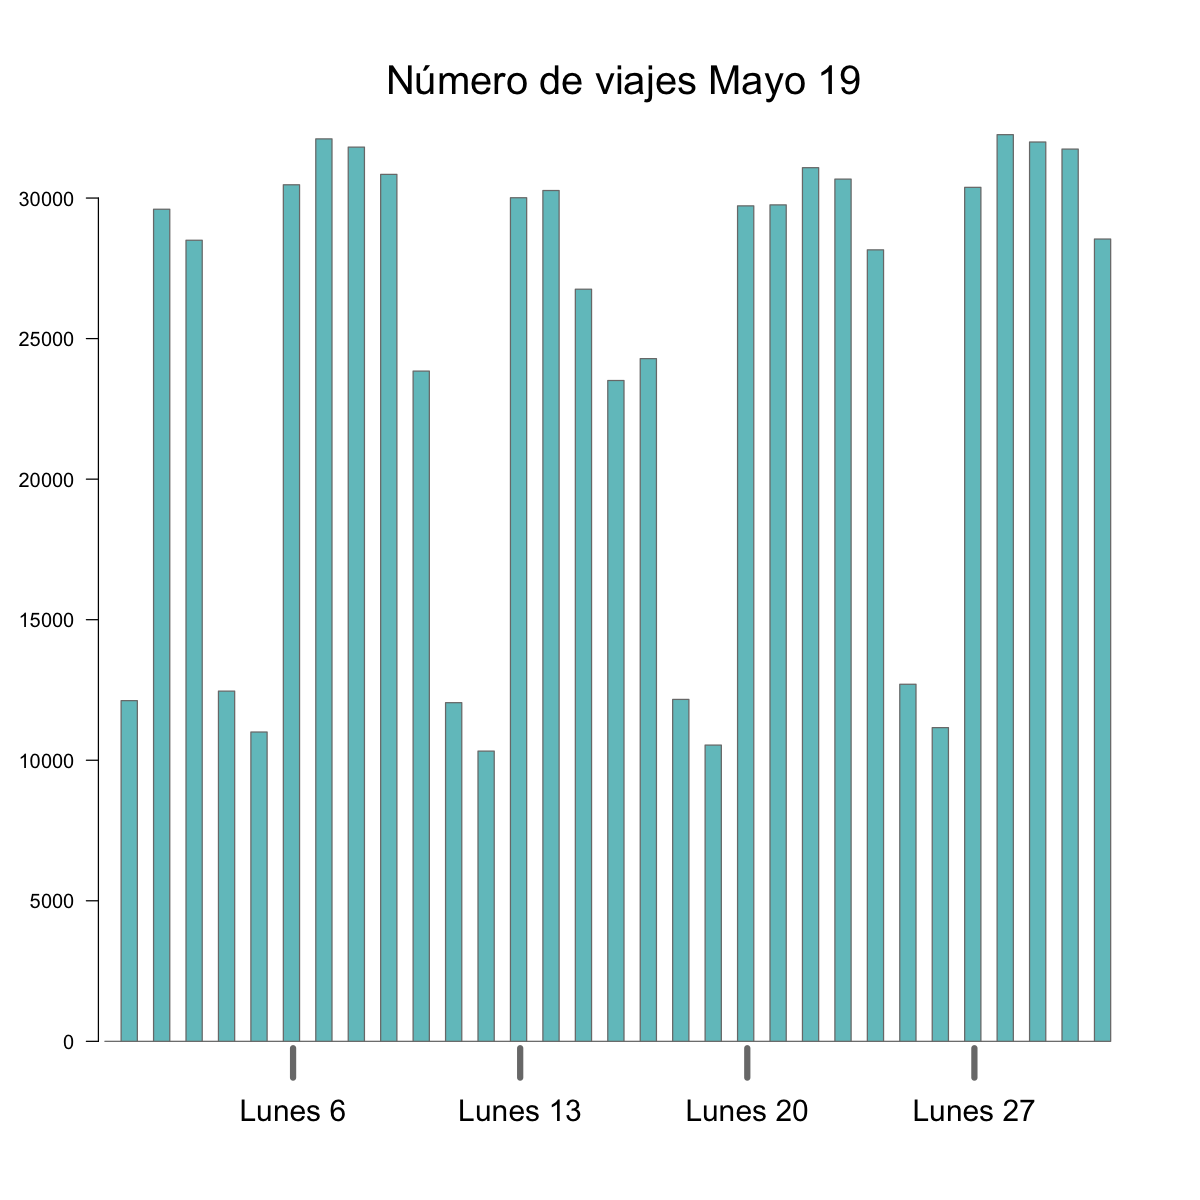

In [191]:
hist(may_19$Dia_Re,col=azul,border='gray48',breaks=seq(0,31,0.5),
     axes=F,xlab='',ylab='',main='',xlim=c(1,31))
axis(1,at=seq(5.8,31,7),col='white',col.ticks='gray48',cex.axis=1.5,
     labels=c('Lunes 6', 'Lunes 13','Lunes 20','Lunes 27'),lwd.tick=5,tck=0.03)
axis(2,las=2)
mtext('Número de viajes Mayo 19',cex=2)

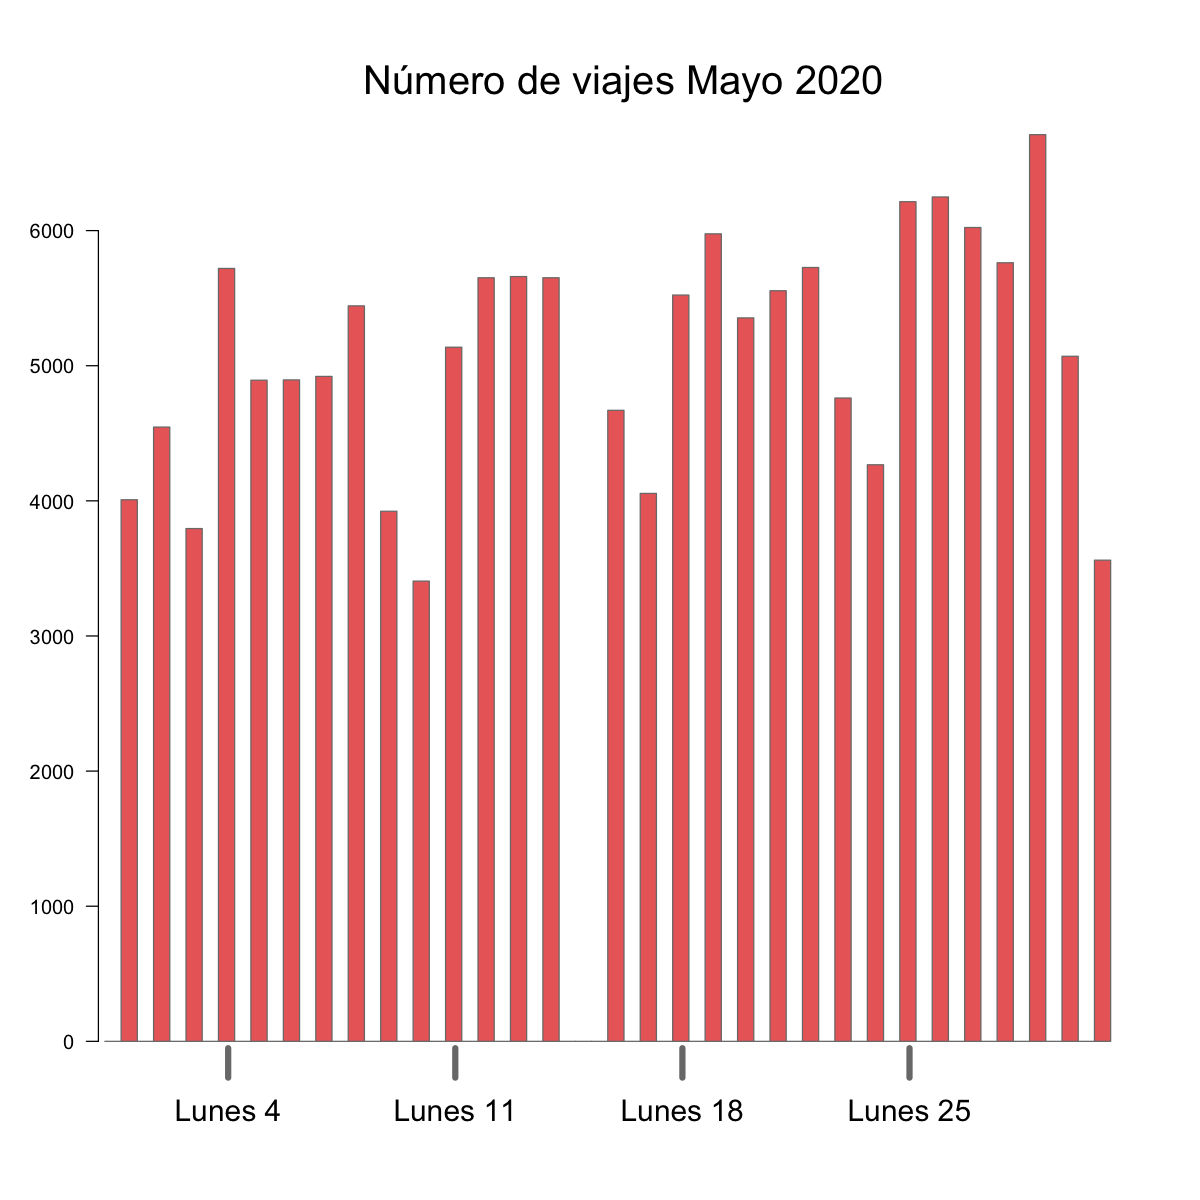

In [190]:
hist(may_20$Dia_Re,col=rosa,border='gray48',breaks=seq(0,31,0.5),
     axes=F,xlab='',ylab='',main='',xlim=c(1,31))
axis(1,at=seq(3.8,31,7),col='white',col.ticks='gray48',cex.axis=1.5,
     labels=c('Lunes 4', 'Lunes 11','Lunes 18','Lunes 25'),lwd.tick=5,tck=0.03)
axis(2,las=2)
mtext('Número de viajes Mayo 2020',cex=2)